
<h1>            PROJECT AI RECOGNITION : NLP APPLICATED IN WEB SEMANTIC</h1>
---



**1-ALL REQUIRED FUNCTIONS TO USE :**

In [1]:
def process_name(x):########################function process name correction
  import re
  if(": INPUTS" in x):
    x=x.replace(": INPUTS",'')
  if(": OUTPUTS" in x):
    x=x.replace(": OUTPUTS",'')
  if(": TOOLS AND TECHNIQUES" in x):
    x=x.replace(": TOOLS AND TECHNIQUES",'')


  regex_1 = re.compile('[^ A-Z]')
  x=regex_1.sub('', str(x))
  
  return x.lower()

In [2]:


def function_concept_df_and_process_name_df(chapter_number,pdf_file):################################### create concepts and process_name dataframe function
  !pip install PyMuPDF #################pymupdf  cet une bibliotheque pour l'extraction du texte de pdf
  import string 
  import fitz # install using: pip install PyMuPDF

  with fitz.open(pdf_file) as doc:
      text = ""
      for page in doc:
        text += page.get_text()##construire un corpus non nettoyee depuis le pdf 
#######1
  text=text.replace('Not For Distribution, Sale or Reproduction.','')
  text=text.replace('Part 1 - Guide','')
  text_cp=text.split('\n')
  import re
  index_list=[]
  dic={}
  l=[]
  for elm in text_cp:
  
    x = re.search(r"[{}]+[.]+[0-9]+[.]+[0-9]+[ ]+[A-Z ]*.*".format(chapter_number), elm)
    if x:
      index_list.append(text_cp.index(elm)) 
      l.append(x.group())
    
    

 
  dic['process_name']=l 
  #big_title.append(x.group())
  index_list_fn=[]
  for i in range(0,len(index_list)):
    if i!=len(index_list)-1:
      index_list_fn.append((index_list[i],index_list[i+1]-1))
    else:
      index_list_fn.append((index_list[i],len(text_cp)))

  l=[]
  for elm in index_list_fn:
    ls=[]
  
    if  index_list_fn.index(elm)==len(index_list_fn)-1:
      for i in range(elm[0]+1,elm[1]):
        ls.append(text_cp[i])
    else:
      for i in range(elm[0]+1,elm[1]+1):
        ls.append(text_cp[i])
    l.append(ls) 


  dic['content']=l
  concepts=[]
  index_concept=[]
  for el in dic['content']:
    lis=[]
    ind=[]
    for elm in el:
    
      x = re.search(r"[{}]+[.]+[0-9]+[.]+[0-9]+[.]+[0-9]+[ ]+[A-Z ]*.*".format(chapter_number), elm)
      if x:

        lis.append(x.group())
        ind.append(text_cp.index(elm))
    concepts.append(lis)
    index_concept.append(ind)
  dic['concepts']=concepts

  index_cp=[]
  for i in range(0,len(index_concept)):
    desc_index=[]
    for j in range(0,len(index_concept[i])):
      if j !=len(index_concept[i])-1:
        desc_index.append((index_concept[i][j],index_concept[i][j+1]))
      else:
        if i!=len(index_concept)-1:
          desc_index.append((index_concept[i][j],index_list[i+1]))
        else:
          desc_index.append((index_concept[i][j],len(text_cp)))

    index_cp.append(desc_index)
  desc_concept=[]
  for elm in index_cp:
    desc_cp=[]
    for el in elm :
      desc_c=[]
      for i in range(el[0]+1,el[1]):
        desc_c.append(text_cp[i])
      desc_cp.append(desc_c)
    desc_concept.append(desc_cp)
  dic['concept_content']=desc_concept

  lst=[]
  for i in range (len(dic['process_name'])):
    for elm in dic['concepts'][i]:
      if 'INPUTS' in dic['process_name'][i]:
        lst.append((elm,'Has_Inputs',dic['process_name'][i])) 
      elif 'TOOLS AND TECHNIQUES' in dic['process_name'][i]:
        lst.append((elm,'Has_Technics_Tools',dic['process_name'][i]))
      else:
        lst.append((elm,'Has_Outputs',dic['process_name'][i]))  
  data={}
  l1=[]
  l2=[]
  l3=[]
  for elm in lst:
    l1.append(elm[0])
    l2.append(elm[1])
    l3.append(elm[2])
  l4=[]
  for d in dic['concept_content']:
    for elm in d:
      l4.append(elm)
  data['concepts']=l1 
  data['type']=l2
  data['Definition'] =l4
  data['process_name']=l3
  import pandas as pd
  df=pd.DataFrame(data)


  define=[]
  for elm in df['Definition']:
    text=""
    for e in elm :
      text+=e+" "
    define.append(text)
  

  desc_list=[]
  for elm in define:
  
    l=[]
    w = re.search(r"Section [0-9]+[.]+[0-9]+[.]+[0-9]+[.]+[0-9]+", elm)
    y = re.search(r"Section [0-9]+[.]+[0-9]+[.]+[0-9]+[.]+[0-9]+[ ]", elm)
    x = re.search(r"Section [0-9]+[.]+[0-9]+[.]+[0-9]+[.]+[0-9]+[.]", elm)
 
    z=re.search(r"Section [0-9]+[.]+[0-9]+[.]+[0-9]+[.]", elm)
    if w:
      l.append(w.group())
    if y:
      l.append(y.group()) 
    if x:
      l.append(x.group())
    
  
    if z:
      l.append(z.group())
    if bool(l) !=False:
      desc_list.append(l)
    else:
      desc_list.append([None])
  desc_list_fn=[]
  for elm in desc_list:
    desc_list_fn.append(elm[0])
  df['DataProperty']=desc_list_fn

  df['concepts']=df['concepts'].apply(process_name)
  df['process_name']=df['process_name'].apply(process_name)
  df['DataProperty']=df['DataProperty'].apply(lambda x:x.lower() if  (x !=None ) else x )
  index_list_1=[]
  dic_1={}
  l=[]
  for elm in text_cp:
  
    x = re.search(r"[{}]+[.]+[0-9]+[ ]+[A-Z]*[ ]+[A-Z ]*".format(chapter_number), elm)
  

    if x :
      if x.group()[4:len(x.group())] not in [elm[4:len(elm)] for elm in l ]:
        index_list_1.append(text_cp.index(elm)) 
        l.append(x.group())
    
    

 
  dic_1['process_name']=l 
  index_list_2=[]

  l_2=[]
  for elm in text_cp:
  
    x = re.search(r"[{}]+[.]+[0-9]+[.]+[0-9]+[ ]+[A-Z ]*.*".format(chapter_number), elm)
    if x and ('INPUTS' in elm):
      index_list_2.append(text_cp.index(elm)) 
      l_2.append(x.group())
  list_2=[]
  for i,j in zip(index_list_1,index_list_2):
  
    list_2.append((i,j))


  l_2=[]
  for elm in list_2:
    ls=[]
  
    if  list_2.index(elm)==len(list_2)-1:
        for i in range(elm[0]+1,elm[1]):
          ls.append(text_cp[i])
    else:
      for i in range(elm[0]+1,elm[1]):
        ls.append(text_cp[i])
    l_2.append(ls) 
  dic_1['Definition']=l_2
  df2=pd.DataFrame(dic_1)
  df2['process_name']=df2['process_name'].apply(process_name)
  return df ,df2


In [3]:
def function_process_name_data_property_df(dataframe):#########################create data property of process name function 
  import re

  fig=[]
  for define in dataframe['Definition']:
    ls=[]
    for elm in define:
    
      x = re.search(r"[Figure]+[ ]+[0-9]+[-]+[0-9]+", elm)
      if x: 
        ls.append(x.group())
    fig.append(list(set(ls)))
  l1=[]
  l2=[]
  for i in range(len(dataframe['process_name'])):
    for el in fig[i]:
      l1.append(dataframe['process_name'][i])
      l2.append(el)
  dic_process_data_ppt={}
  dic_process_data_ppt['Domaine']=l1
  dic_process_data_ppt['Data_Property']=["Depicted_In" for i in range(len(l1))]
  dic_process_data_ppt['Range']=l2
    

  import pandas as pd
  df_process_name_data_property=pd.DataFrame(dic_process_data_ppt)
  return df_process_name_data_property



In [4]:
def function_process_name_definition_correction_df(dataframe): ################# process name string correction
  import re
  k=0
  for t in dataframe['Definition']:  
    text=''
    counter=0
    for elm in t :
      if '• ' in elm:
        counter=1 
      if "inputs" in elm :
        counter=1
        txt=''
        for e in elm.split() :
          if 'inputs'  in e:
            for i in range((elm.split().index(e))-1):
              txt+=elm.split()[i]+' '
            text+=txt+' '
      if counter==0:
        text+=elm+' '
      x = re.search(r"[0-9]+[0-9]+[0-9]+", elm)
      if x: 
        counter=0
    dataframe['Definition'][k]=text.lower()
    
    k=k+1
   
    
  return dataframe  

In [5]:
def clean_text(text):###########################clean text function 
  import re ########################## regex avec laquelle on va nettoyer notre texte avec des pattern 
  import string 
  pattern_alpha = r'[0-9]'         ############################ pattern pour eliminer les numeros
  regex_alpha = re.compile(pattern_alpha)
  text=regex_alpha.sub('', text)
  pattern = r'[' + string.punctuation + ']'  ############################# pattern pour eliminer les caractere speciaux et les ponctuation 
  sample_str = re.sub(pattern, '', text)
  sample_str=sample_str.replace("® ","")
  sample_str=sample_str.replace("•","")
  sample_str=sample_str.replace("u u","")
  sample_str=sample_str.replace("—"," ")
  sample_str=sample_str.replace("u m","")
  sample_str=sample_str.replace("u n","")
  sample_str=sample_str.replace(" – "," ")
  sample_str=sample_str.replace(" x "," ")
  sample_str=sample_str.replace("− "," ")
  sample_str=sample_str.replace(" − "," ")
  sample_str = sample_str.strip() ################# methode pour eliminer le  caractere retour a la ligne les espace non necessaire
 
  return sample_str


In [6]:
def out_text(definitions):
  list_def=[]
  for elm in definitions:
    text_list= elm
    text=""
    for elm in text_list:
      text+=elm+" "
    text=text.lower()
    list_def.append(clean_text(text))
  return list_def


In [7]:
def corpus_list(def_list):
  import spacy
  corpus_list=[]
  nlp = spacy.load("en_core_web_sm")
  for elm in def_list:
    doc = nlp(elm)
    empty_list = []
    for token in doc:
      empty_list.append(token.lemma_)

    
    corpus_list.append(empty_list)
  en = spacy.load('en_core_web_sm')
  stopwords = en.Defaults.stop_words
  nlp.Defaults.stop_words |= {"that","can","describe","that","how","the","section"}
  # print(len(stopwords))
  corps_list=[]
  for elm in corpus_list:
    
   
    lst=[]
    for token in elm:
      if token not in stopwords:    #checking whether the word is not 
        lst.append(token) 
    final_string = ' '.join(map(str,lst)) 
    corps_list.append(final_string)


  return corps_list


In [8]:
def function_list_matcher(corpus_list)  :
  import spacy
  from spacy.matcher import Matcher ##initialiser ou creer une instance  
  nlp = spacy.load("en_core_web_sm") #### appliquer ce modele de spacy sur notre document 
  matcher = Matcher(nlp.vocab) ###initialiser le matcher pour extraction des phrases basee sur nos patterns
  pattern1=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern2=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern3=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"}]##objProprety
  pattern4=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern5=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern6=[{"TAG":"NN"},{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"}]##objProprety
  pattern7=[{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern8=[{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"},{"TAG":"NN"}]##objProprety
  pattern9=[{"TAG":"NN"},{"TAG":{"REGEX":"^V"},"OP":"+"},{"TAG":"NN"}]##objProprety
  matcher.add("pattern1",  [pattern1])
  matcher.add("pattern2",  [pattern2])
  matcher.add("pattern3",  [pattern3])
  matcher.add("pattern4",  [pattern4])
  matcher.add("pattern5",  [pattern5])
  matcher.add("pattern6",  [pattern6])
  matcher.add("pattern7",  [pattern7])
  matcher.add("pattern8",  [pattern8])
  matcher.add("pattern9",  [pattern9])
  list_oppt=[]
  for elm in corpus_list:

    doc = nlp(elm)
    





    matches = matcher(doc) #####matcher les pharses qui suivent les regles 
    for match_id, start, end in matches:
      string_id = nlp.vocab.strings[match_id]  # Get string representation
      if string_id=="pattern1":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern2":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern3":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern4":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern5":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern6":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern7":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern8":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
      elif string_id=="pattern9":
        span = doc[start:end]  # The matched span
        list_oppt.append( span.text) ######## visualiser le nom du regles et la phrase
  return list_oppt

In [9]:
def function_object_property(list_oppt):  
  import pandas as pd
  import spacy
 
  nlp = spacy.load("en_core_web_sm") #### appliquer ce modele de spacy sur notre document 
  data=set(list_oppt)
  from sklearn.feature_extraction.text import CountVectorizer

  count_vectorizer = CountVectorizer() ######initialisation de instance pour faire le tokenization
  vector_matrix = count_vectorizer.fit_transform(data) #### application de transformation sur nos donnees
  tokens = count_vectorizer.get_feature_names()
  from sklearn.metrics.pairwise import cosine_similarity

  cosine_similarity_matrix = cosine_similarity(vector_matrix)#### utiliser la methode cosine similarity pour visualizer regroupee les phrase qui se correspondent en un meme cluster  pour eliminer le redondonce des phrase qui ont le meme contexte 
  df=pd.DataFrame(data=cosine_similarity_matrix,columns=data)
  cluster=[]
  for index in df.index:
    lst=[]
    for col in df.columns:
      if df.loc[index,col]>0.7:###treshold est fixee a 0.6 --->regrouper les documents qui ont une similarite =0.6 ou >0.6
        lst.append(col)
    cluster.append(lst)
  documents=[]
  for c in cluster:
    max=[]
    for l in c :
      if len(max)<len(l):
        max=l
    documents.append(max) ###choisir la phrase la plus long qui contribue au max d information pour chaque cluster 
  ll=[]
  for elm in documents:
    doc=nlp(elm)
    dm=''
    rg=''
    vb=''
    c=0
    for token in doc :
      if token.pos_=='VERB':
        c=1
        vb+=token.text
      elif c==0:
        dm+=token.text+' '
      else:
        rg+=token.text+' '
      
        
        
    
    ll.append((dm,vb,rg))
  for elm in ll:
    if elm[0]=='' or elm[1]=='' or elm[2]=='' :
      ll.remove(elm)
  ll=list(set(ll))
  Domaine=[]
  Range=[]
  Object_Property=[]
  dict_of_other_concepts={}
  for elm in ll:
    Domaine.append(elm[0])
    Object_Property.append(elm[1])
    Range.append(elm[2])
  dict_of_other_concepts['Domaine']=Domaine
  dict_of_other_concepts['Object_Property']=Object_Property
  dict_of_other_concepts['Range']=Range
  df_other=pd.DataFrame(dict_of_other_concepts)
  return df_other

In [10]:
def function_object_property_final_df(definition):#########################create obj property dataframe
  lsst=out_text(definition)
  corpus=corpus_list(lsst)
  list_oppt=function_list_matcher(corpus)
  df=function_object_property(list_oppt)
  return df


In [11]:
def function_synonyms(words): ############synonyms function
  import nltk
  nltk.download('wordnet')
  nltk.download('omw-1.4')
  nltk.download('punkt')


  from nltk.corpus import wordnet
  from nltk.corpus import wordnet as wn

  from nltk.tokenize import word_tokenize
  

  
  lst_syn=[]
  for word in words:
    t=word_tokenize(word)
   
    synonyms = []

    for elm in t:
      lt=[]
      for syn in wordnet.synsets(elm):
        
        for l in syn.lemmas():
          
            lt.append(l.name())
      synonyms.append((elm,lt))
    lst=[]
    for elm in synonyms:
      try:
        w1 = wordnet.synsets(elm[0])[0]
        
        l=[]
        for w in elm[1]:
          w2 = wordnet.synsets(w)[0]
          l.append((w,w2.wup_similarity(w1)))
      #print(l)
    
        lst.append((elm[0],l))
      except:
        pass


    text=''
    for elm in lst:
      syn=[elm[0],0]
    
      for e in elm[1]:
      
        if e[0]!=elm[0] and syn[1]<e[1] :
          syn[0]=e[0]
          syn[1]=e[1]
      text+=syn[0]+' '
    lst_syn.append(text)
  return lst_syn

In [12]:
################################################################# ALL REQUIRED FUNCTION ########################################################################################################################
#################################################################################################################################################################################################################
################################################################################################################################################################################################################

**2-CREATE ALL NEEDED DATAFRAMES FOR ONTOLOGY FILE BUILDING :**

In [13]:
df1,df2=function_concept_df_and_process_name_df(5,'PROJECT_SCOPE_MANAGEMENT.pdf')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
df3,df4=function_concept_df_and_process_name_df(6,'PROJECT_SCHEDULE_MANAGEMENT.pdf')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
df5,df6=function_concept_df_and_process_name_df(7,'PROJECT_COST_MANAGEMENT.pdf')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
df_obj1=function_object_property_final_df(df1['Definition'])
df_obj2=function_object_property_final_df(df2['Definition'])
df_obj3=function_object_property_final_df(df3['Definition'])
df_obj4=function_object_property_final_df(df4['Definition'])
df_obj5=function_object_property_final_df(df5['Definition'])
df_obj6=function_object_property_final_df(df6['Definition'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
import pandas as pd
df_obj_final=pd.concat([df_obj1,df_obj2,df_obj3,df_obj4,df_obj5,df_obj6],axis=0)

In [18]:
# df_obj_final.drop_duplicates(inplace=True)

df_obj_final

,Domaine,Object_Property,Range
0,control scope,include,cause variance
1,improvement,provide,basis measure performance
2,breakdown,verify,correctness
3,knowledge area basis,perform,validation
4,project charter,provide,highlevel project
...,...,...,...
23,project planning,set,framework cost
24,process,provide,guidance direction project
25,stakeholder approve change,associated,cost
26,project budget,include,contingency


In [19]:
df2_data_property=function_process_name_data_property_df(df2)
df4_data_property=function_process_name_data_property_df(df4)
df6_data_property=function_process_name_data_property_df(df6)

In [20]:
df_process_name_data_property_final=pd.concat([df2_data_property,df4_data_property,df6_data_property],axis=0)
df_process_name_data_property_final

,Domaine,Data_Property,Range
0,plan scope management,Depicted_In,Figure 5-3
1,plan scope management,Depicted_In,Figure 5-2
2,collect requirements,Depicted_In,Figure 5-4
3,collect requirements,Depicted_In,Figure 5-5
4,define scope,Depicted_In,Figure 5-8
5,define scope,Depicted_In,Figure 5-9
6,create wbs,Depicted_In,Figure 5-10
7,create wbs,Depicted_In,Figure 5-11
8,validate scope,Depicted_In,Figure 5-16
9,validate scope,Depicted_In,Figure 5-15


In [21]:
df1_pre_final=function_process_name_definition_correction_df(df1)
df2_pre_final=function_process_name_definition_correction_df(df2)
df3_pre_final=function_process_name_definition_correction_df(df3)
df4_pre_final=function_process_name_definition_correction_df(df4)
df5_pre_final=function_process_name_definition_correction_df(df5)
df6_pre_final=function_process_name_definition_correction_df(df6)

In [22]:
df6_pre_final

,process_name,Definition
0,plan cost management,plan cost management is the process of deﬁning...
1,estimate costs,estimate costs is the process of developing an...
2,determine budget,determine budget is the process of aggregating...
3,control costs,control costs is the process of monitoring the...


In [23]:
df6_pre_final.Definition=df6_pre_final.Definition.apply(clean_text)

In [24]:
df6_pre_final

,process_name,Definition
0,plan cost management,plan cost management is the process of deﬁning...
1,estimate costs,estimate costs is the process of developing an...
2,determine budget,determine budget is the process of aggregating...
3,control costs,control costs is the process of monitoring the...


In [25]:
df1_pre_final.Definition=df1_pre_final.Definition.apply(clean_text)
df2_pre_final.Definition=df2_pre_final.Definition.apply(clean_text)
df3_pre_final.Definition=df3_pre_final.Definition.apply(clean_text)
df4_pre_final.Definition=df4_pre_final.Definition.apply(clean_text)
df5_pre_final.Definition=df5_pre_final.Definition.apply(clean_text)

In [26]:
df3_pre_final

,concepts,type,Definition,process_name,DataProperty
0,project charter,Has_Inputs,described in section the project charter deﬁn...,plan schedule management,section 4.1.3.1
1,project management plan,Has_Inputs,described in section project management plan ...,plan schedule management,section 4.3.2.1
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan schedule management,None
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan schedule management,None
4,expert judgment,Has_Technics_Tools,described in section expertise should be cons...,plan schedule management,section 4.1.2.1
...,...,...,...,...,...
57,schedule data,Has_Outputs,the schedule data for the project schedule mod...,develop schedule,None
58,project calendars,Has_Outputs,a project calendar identiﬁes working days and ...,develop schedule,None
59,change requests,Has_Outputs,described in section modiﬁcations to the proj...,develop schedule,section 4.3.3.4
60,project management plan updates,Has_Outputs,any change to the project management plan goes...,develop schedule,section 6.1.3.1


In [27]:
df_pre_final_process_name=pd.concat([df2_pre_final,df4_pre_final,df6_pre_final],axis=0)
df_pre_final_process_name

,process_name,Definition
0,plan scope management,plan scope management is the process of creati...
1,collect requirements,collect requirements is the process of determi...
2,define scope,define scope is the process of developing a de...
3,create wbs,create wbs is the process of subdividing proje...
4,validate scope,validate scope is the process of formalizing a...
5,control scope,control scope is the process of monitoring the...
0,plan schedule management,plan schedule management is the process of est...
1,define activities,deﬁne activities is the process of identifying...
2,sequence activities,sequence activities is the process of identify...
3,estimate activity durations,estimate activity durations is the process of ...


In [28]:
df_pre_final_concepts=pd.concat([df1_pre_final,df3_pre_final,df5_pre_final],axis=0)
df_pre_final_concepts

,concepts,type,Definition,process_name,DataProperty
0,project charter,Has_Inputs,described in section the project charter docu...,plan scope management,section 4.1.3.1
1,project management plan,Has_Inputs,described in section project management plan ...,plan scope management,section 4.2.3.1
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None
4,expert judgment,Has_Technics_Tools,described in section expertise should be cons...,plan scope management,section 4.1.2.1
...,...,...,...,...,...
46,work performance information,Has_Outputs,described in section work performance informa...,control costs,section 4.5.1.3
47,cost forecasts,Has_Outputs,either a calculated eac value or a bottomup ea...,control costs,None
48,change requests,Has_Outputs,described in section analysis of project perf...,control costs,section 4.3.3.4
49,project management plan updates,Has_Outputs,any change to the project management plan goes...,control costs,section 7.1.3.1


In [29]:
##################################################################END OF WORK PRE TRAITEMENT #####################################################################################################
##################################################################################################################################################################################################
##################################################################################################################################################################################################

In [30]:
df_pre_final_concepts['Definition']=df_pre_final_concepts['Definition'].apply(lambda x : x.replace('described in section',''))
df_pre_final_concepts############concept DF

,concepts,type,Definition,process_name,DataProperty
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1
...,...,...,...,...,...
46,work performance information,Has_Outputs,work performance information includes inform...,control costs,section 4.5.1.3
47,cost forecasts,Has_Outputs,either a calculated eac value or a bottomup ea...,control costs,None
48,change requests,Has_Outputs,analysis of project performance may result i...,control costs,section 4.3.3.4
49,project management plan updates,Has_Outputs,any change to the project management plan goes...,control costs,section 7.1.3.1


In [31]:
df_pre_final_process_name['Definition']=df_pre_final_process_name['Definition'].apply(lambda x : x.replace('described in section',''))
df_pre_final_process_name##############process name DF

,process_name,Definition
0,plan scope management,plan scope management is the process of creati...
1,collect requirements,collect requirements is the process of determi...
2,define scope,define scope is the process of developing a de...
3,create wbs,create wbs is the process of subdividing proje...
4,validate scope,validate scope is the process of formalizing a...
5,control scope,control scope is the process of monitoring the...
0,plan schedule management,plan schedule management is the process of est...
1,define activities,deﬁne activities is the process of identifying...
2,sequence activities,sequence activities is the process of identify...
3,estimate activity durations,estimate activity durations is the process of ...


In [32]:
df_pre_final_process_name.reset_index(drop=True,inplace=True)###############reset index
df_pre_final_concepts.reset_index(drop=True,inplace=True)
df_process_name_data_property_final.reset_index(drop=True,inplace=True)
df_obj_final.reset_index(drop=True,inplace=True)

**3-ALL DATAFRAMES FINAL VESRION :**

In [33]:
######################################################### ALL DATAFRAMES PRETRAITED ####################################################################

In [34]:
df_pre_final_process_name############ process name DF

,process_name,Definition
0,plan scope management,plan scope management is the process of creati...
1,collect requirements,collect requirements is the process of determi...
2,define scope,define scope is the process of developing a de...
3,create wbs,create wbs is the process of subdividing proje...
4,validate scope,validate scope is the process of formalizing a...
5,control scope,control scope is the process of monitoring the...
6,plan schedule management,plan schedule management is the process of est...
7,define activities,deﬁne activities is the process of identifying...
8,sequence activities,sequence activities is the process of identify...
9,estimate activity durations,estimate activity durations is the process of ...


In [35]:
df_pre_final_concepts ########concept DF

,concepts,type,Definition,process_name,DataProperty
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1
...,...,...,...,...,...
163,work performance information,Has_Outputs,work performance information includes inform...,control costs,section 4.5.1.3
164,cost forecasts,Has_Outputs,either a calculated eac value or a bottomup ea...,control costs,None
165,change requests,Has_Outputs,analysis of project performance may result i...,control costs,section 4.3.3.4
166,project management plan updates,Has_Outputs,any change to the project management plan goes...,control costs,section 7.1.3.1


In [36]:
df_process_name_data_property_final###################process name data property DF

,Domaine,Data_Property,Range
0,plan scope management,Depicted_In,Figure 5-3
1,plan scope management,Depicted_In,Figure 5-2
2,collect requirements,Depicted_In,Figure 5-4
3,collect requirements,Depicted_In,Figure 5-5
4,define scope,Depicted_In,Figure 5-8
5,define scope,Depicted_In,Figure 5-9
6,create wbs,Depicted_In,Figure 5-10
7,create wbs,Depicted_In,Figure 5-11
8,validate scope,Depicted_In,Figure 5-16
9,validate scope,Depicted_In,Figure 5-15


In [37]:
df_obj_final############### object property DF

,Domaine,Object_Property,Range
0,control scope,include,cause variance
1,improvement,provide,basis measure performance
2,breakdown,verify,correctness
3,knowledge area basis,perform,validation
4,project charter,provide,highlevel project
...,...,...,...
653,project planning,set,framework cost
654,process,provide,guidance direction project
655,stakeholder approve change,associated,cost
656,project budget,include,contingency


In [38]:
###########################################################ADD SYNONYMS #########################################################################

In [39]:
syn_concepts=function_synonyms(df_pre_final_concepts['concepts'])
df_pre_final_concepts['synonyms']=syn_concepts
df_pre_final_concepts

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,concepts,type,Definition,process_name,DataProperty,synonyms
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1,undertaking lease
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1,undertaking direction program
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None,endeavor environmental factor
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None,organisational procedure asset
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1,adept opinion
...,...,...,...,...,...,...
163,work performance information,Has_Outputs,work performance information includes inform...,control costs,section 4.5.1.3,process public_presentation info
164,cost forecasts,Has_Outputs,either a calculated eac value or a bottomup ea...,control costs,None,toll prognosis
165,change requests,Has_Outputs,analysis of project performance may result i...,control costs,section 4.3.3.4,alteration request
166,project management plan updates,Has_Outputs,any change to the project management plan goes...,control costs,section 7.1.3.1,undertaking direction program update


In [40]:
syn_process_name=function_synonyms(df_pre_final_process_name['process_name'])
df_pre_final_process_name['synonyms']=syn_process_name
df_pre_final_process_name

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,process_name,Definition,synonyms
0,plan scope management,plan scope management is the process of creati...,program range direction
1,collect requirements,collect requirements is the process of determi...,hoard requirement
2,define scope,define scope is the process of developing a de...,delimit range
3,create wbs,create wbs is the process of subdividing proje...,produce west_by_south
4,validate scope,validate scope is the process of formalizing a...,corroborate range
5,control scope,control scope is the process of monitoring the...,dominance range
6,plan schedule management,plan schedule management is the process of est...,program agenda direction
7,define activities,deﬁne activities is the process of identifying...,delimit activity
8,sequence activities,sequence activities is the process of identify...,episode activity
9,estimate activity durations,estimate activity durations is the process of ...,approximation action duration


In [41]:
########################################### ALL REQUIRED DATAFRAMES READY FOR ONTOLOGY ###################################################### 

**4-BUILDING THE ONTHOLOGY FILE:**

In [42]:
!pip install rdflib
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS, XSD
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras import describer
######################## import all necessary lib for onto parsing  ################################

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
g= Graph()
g.bind("owl",OWL)
g.bind("pr","http://example.org/projectOntology/")
ns_url = "http://example.org/projectOntology/"
g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))################# initializing the owl file create instance g 

<Graph identifier=N41d3ddf1b6e0444c9b7ac159f4cfd526 (<class 'rdflib.graph.Graph'>)>

In [44]:
for c in df_pre_final_process_name['process_name']:########################ALL CLASS AND SUBCLASS ###########################################
  cl = URIRef(ns_url+c.replace(" ","_"))
  g.add((cl, RDF.type, OWL.Class))
  clOutput =URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
  g.add((clOutput, RDF.type, OWL.Class))
  g.add((clOutput, RDFS.subClassOf, cl))
  clTools =URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
  g.add((clTools, RDF.type, OWL.Class))
  g.add((clTools, RDFS.subClassOf, cl))
  clInput =URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
  g.add((clInput, RDF.type, OWL.Class))
  g.add((clInput, RDFS.subClassOf, cl))
  

In [45]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [46]:
# g= Graph()
# g.bind("owl",OWL)
# g.bind("pr","http://example.org/projectOntology/")
# ns_url = "http://example.org/projectOntology/"
# g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

In [47]:
df_process=df_pre_final_concepts.drop_duplicates( subset='concepts',keep='first', inplace=False)
df_process

,concepts,type,Definition,process_name,DataProperty,synonyms
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1,undertaking lease
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1,undertaking direction program
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None,endeavor environmental factor
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None,organisational procedure asset
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1,adept opinion
...,...,...,...,...,...,...
151,financing,Has_Technics_Tools,financing entails acquiring funding for projec...,determine budget,None,finance
152,cost baseline,Has_Outputs,the cost baseline is the approved version of t...,determine budget,section 7.2.2.6,toll service_line
153,project funding requirements,Has_Outputs,total funding requirements and periodic fundin...,determine budget,None,undertaking financial_support requirement
161,tocomplete performance index,Has_Technics_Tools,the tocomplete performance index tcpi is a mea...,control costs,None,public_presentation indicant


In [48]:
for i in df_process.index:  ################################### ALL INDIV ##################################################
  if df_process.loc[i,'type']=='Has_Inputs'	:
    c=df_process.loc[i,'process_name']
    clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
    ind = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
    g.add((ind, RDF.type, clo))
  if df_process.loc[i,'type']=='Has_Outputs'	:
    c=df_process.loc[i,'process_name']
    clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
    ind = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
    g.add((ind, RDF.type, clo))
  if df_process.loc[i,'type']=='Has_Technics_Tools'	:
    c=df_process.loc[i,'process_name']
    clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
    ind = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
    g.add((ind, RDF.type, clo))





In [49]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [50]:
# g= Graph()
# g.bind("owl",OWL)
# g.bind("pr","http://example.org/projectOntology/")
# ns_url = "http://example.org/projectOntology/"
# g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

In [51]:
for i in range(len(df_process_name_data_property_final)):########################### ALL DATA PROPERTY ############################################
  domaine = URIRef(ns_url+df_process_name_data_property_final.loc[i,'Domaine'].replace(" ","_"))
  data_prop=URIRef(ns_url+df_process_name_data_property_final.loc[i,'Range'].replace(" ","_"))
  g.add((data_prop,RDF.type,OWL.DatatypeProperty))
  g.add((data_prop,RDFS.domain,domaine))
  g.add((data_prop,RDFS.range,XSD.string))

In [52]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [53]:
# g= Graph()
# g.bind("owl",OWL)
# g.bind("pr","http://example.org/projectOntology/")
# ns_url = "http://example.org/projectOntology/"
# g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

In [54]:
df_process=df_pre_final_concepts.drop_duplicates( subset='DataProperty',keep='first', inplace=False)
df_process

,concepts,type,Definition,process_name,DataProperty,synonyms
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1,undertaking lease
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1,undertaking direction program
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None,endeavor environmental factor
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1,adept opinion
11,project documents,Has_Inputs,examples of project documents that can be cons...,collect requirements,section 4.1.3.2,undertaking document
12,business documents,Has_Inputs,a business document that can inﬂuence the co...,collect requirements,section 1.2.6.,business_concern document
13,agreements,Has_Inputs,agreements can contain project and product r...,collect requirements,section 12.2.3.2,agreement
17,data gathering,Has_Technics_Tools,datagathering techniques that can be used for ...,collect requirements,section 4.1.2.2,information assemblage
18,data analysis,Has_Technics_Tools,data analysis techniques that can be used fo...,collect requirements,section 4.5.2.2,information psychoanalysis
21,interpersonal and team skills,Has_Technics_Tools,the interpersonal and team skills that can b...,collect requirements,section 4.1.2.3,interpersonal squad skill


In [55]:
for i in df_process.index:
  if df_process.loc[i,'DataProperty']!=None:
    c = URIRef(ns_url+df_process.loc[i,'DataProperty'].replace(" ","_"))
    domaine = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
    g.add((c, RDF.type, OWL.DatatypeProperty))
    g.add((c, RDFS.domain, domaine))
    g.add((c, RDFS.range, XSD.string))
    

In [56]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [57]:
# g= Graph()
# g.bind("owl",OWL)
# g.bind("pr","http://example.org/projectOntology/")
# ns_url = "http://example.org/projectOntology/"
# g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

In [58]:
for i in range(len(df_pre_final_process_name)) : #########################################ALL DEFINED BY ##########################################
  c = URIRef(ns_url+df_pre_final_process_name.loc[i,'process_name'].replace(" ","_"))
  desc=df_pre_final_process_name.loc[i,'Definition']
  definedby = Literal(desc,datatype=XSD.string)
  g.add((c, RDFS.isDefinedBy, definedby))

In [59]:
df_process=df_pre_final_concepts.drop_duplicates( subset='concepts',keep='first', inplace=False)
df_process

,concepts,type,Definition,process_name,DataProperty,synonyms
0,project charter,Has_Inputs,the project charter documents the project pu...,plan scope management,section 4.1.3.1,undertaking lease
1,project management plan,Has_Inputs,project management plan components include b...,plan scope management,section 4.2.3.1,undertaking direction program
2,enterprise environmental factors,Has_Inputs,the enterprise environmental factors that can ...,plan scope management,None,endeavor environmental factor
3,organizational process assets,Has_Inputs,the organizational process assets that can inﬂ...,plan scope management,None,organisational procedure asset
4,expert judgment,Has_Technics_Tools,expertise should be considered from individu...,plan scope management,section 4.1.2.1,adept opinion
...,...,...,...,...,...,...
151,financing,Has_Technics_Tools,financing entails acquiring funding for projec...,determine budget,None,finance
152,cost baseline,Has_Outputs,the cost baseline is the approved version of t...,determine budget,section 7.2.2.6,toll service_line
153,project funding requirements,Has_Outputs,total funding requirements and periodic fundin...,determine budget,None,undertaking financial_support requirement
161,tocomplete performance index,Has_Technics_Tools,the tocomplete performance index tcpi is a mea...,control costs,None,public_presentation indicant


In [60]:

for i in df_process.index :
  c = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
  desc=df_process.loc[i,'Definition']
  definedby = Literal(desc,datatype=XSD.string)
  g.add((c, RDFS.isDefinedBy, definedby))

In [61]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [62]:
# g= Graph()
# g.bind("owl",OWL)
# g.bind("pr","http://example.org/projectOntology/")
# ns_url = "http://example.org/projectOntology/"
# g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

In [63]:
for i in df_pre_final_process_name.index : ##########################ALL SEE ALSO ##################################################################
  c = URIRef(ns_url+df_pre_final_process_name.loc[i,'process_name'].replace(" ","_"))
  sy=df_pre_final_process_name.loc[i,'synonyms']
  syn = Literal( sy,datatype=XSD.string)
  g.add((c, RDFS.seeAlso, syn))

In [64]:
for i in df_process.index :
  c = URIRef(ns_url+df_process.loc[i,'concepts'].replace(" ","_"))
  sy=df_process.loc[i,'synonyms']
  syn = Literal( sy,datatype=XSD.string)
  g.add((c, RDFS.seeAlso, syn))

In [65]:
# g.serialize(destination='PmbokOntology.owl',format='pretty-xml')

In [66]:
df_process=df_obj_final.drop_duplicates(subset='Object_Property', keep='first', inplace=False)
df_process

,Domaine,Object_Property,Range
0,control scope,include,cause variance
1,improvement,provide,basis measure performance
2,breakdown,verify,correctness
3,knowledge area basis,perform,validation
5,structure,represent,number form
...,...,...,...
582,risk time,remain,project
590,project team,predict,encounter perform
595,work,performbudgeted,rate eac method
623,stakeholder approve change,associated,cost


In [67]:
for i in df_process.index: ##########################ALL OBJECT PROPERTY ########################################################
  if(df_process['Object_Property'][i]!=None  and   df_process['Domaine'][i]!=None and  df_process['Range'][i]!=None ):
    c = URIRef(ns_url+df_process['Object_Property'][i].replace(" ","_"))
    domaine = URIRef(ns_url+df_process['Domaine'][i].replace(" ","_"))
    rang = URIRef(ns_url+df_process['Range'][i].replace(" ","_"))
    g.add((domaine, RDF.type, OWL.Class))
    g.add((rang, RDF.type, OWL.Class))
    g.add((c,RDF.type,OWL.ObjectProperty))
    g.add((c,RDFS.domain,domaine))
    g.add((c,RDFS.range,rang))


In [68]:
g.serialize(destination='PmbokOntology.owl',format='pretty-xml') ####################FILE GENERATION ############################

<Graph identifier=N41d3ddf1b6e0444c9b7ac159f4cfd526 (<class 'rdflib.graph.Graph'>)>

In [69]:
############################################# THE END OF OWL FILE GENERATION ###############################################################################

**5-ONTHOLOGY EVALUATION :**

In [70]:
df_pre_final_concepts['process_name'].tolist()

[' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' plan scope management',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' collect requirements',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' define scope',
 ' create wbs',
 ' create wbs',
 ' create wbs',
 ' create wbs',
 ' create wbs',
 ' create wbs',
 ' 

In [71]:
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
def_concept=[]
for elm in df_pre_final_concepts['Definition']:
  def_concept.append(elm[:3000])
def_concept

['  the project charter documents the project purpose highlevel project description  assumptions constraints and highlevel requirements that the project is intended to satisfy',
 '  project management plan components include but are not limited to  quality management plan   the way the project and product scope will be   managed can be inﬂuenced by how the organization’s quality policy methodologies and standards are  implemented on the project  project life cycle description the project life cycle determines the series of phases that a project passes  through from its inception to the end of the project   development approach the development approach deﬁnes whether waterfall iterative adaptive agile or a  hybrid development approach will be used',
 'the enterprise environmental factors that can inﬂuence the plan scope management process include but are not  limited to  organization’s culture  infrastructure  personnel administration and  marketplace conditions',
 'the organizational p

In [73]:
all_data_combined = def_concept+df_pre_final_concepts['concepts'].tolist() +df_pre_final_concepts['process_name'].tolist()+df_pre_final_concepts['DataProperty'].tolist()+df_obj_final['Domaine'].tolist()+df_obj_final['Object_Property'].tolist()+df_obj_final['Range'].tolist()+df_process_name_data_property_final['Range'].tolist()+df_pre_final_process_name['Definition'].tolist()

In [74]:
all_data_combined

['  the project charter documents the project purpose highlevel project description  assumptions constraints and highlevel requirements that the project is intended to satisfy',
 '  project management plan components include but are not limited to  quality management plan   the way the project and product scope will be   managed can be inﬂuenced by how the organization’s quality policy methodologies and standards are  implemented on the project  project life cycle description the project life cycle determines the series of phases that a project passes  through from its inception to the end of the project   development approach the development approach deﬁnes whether waterfall iterative adaptive agile or a  hybrid development approach will be used',
 'the enterprise environmental factors that can inﬂuence the plan scope management process include but are not  limited to  organization’s culture  infrastructure  personnel administration and  marketplace conditions',
 'the organizational p

In [75]:
all_data=[]
for elm in all_data_combined:
  if elm !=None :
    all_data.append(elm)
all_data

['  the project charter documents the project purpose highlevel project description  assumptions constraints and highlevel requirements that the project is intended to satisfy',
 '  project management plan components include but are not limited to  quality management plan   the way the project and product scope will be   managed can be inﬂuenced by how the organization’s quality policy methodologies and standards are  implemented on the project  project life cycle description the project life cycle determines the series of phases that a project passes  through from its inception to the end of the project   development approach the development approach deﬁnes whether waterfall iterative adaptive agile or a  hybrid development approach will be used',
 'the enterprise environmental factors that can inﬂuence the plan scope management process include but are not  limited to  organization’s culture  infrastructure  personnel administration and  marketplace conditions',
 'the organizational p

In [76]:
ch=''
for e in all_data:
  ch+='. '+str(e)
ch

'.   the project charter documents the project purpose highlevel project description  assumptions constraints and highlevel requirements that the project is intended to satisfy.   project management plan components include but are not limited to  quality management plan   the way the project and product scope will be   managed can be inﬂuenced by how the organization’s quality policy methodologies and standards are  implemented on the project  project life cycle description the project life cycle determines the series of phases that a project passes  through from its inception to the end of the project   development approach the development approach deﬁnes whether waterfall iterative adaptive agile or a  hybrid development approach will be used. the enterprise environmental factors that can inﬂuence the plan scope management process include but are not  limited to  organization’s culture  infrastructure  personnel administration and  marketplace conditions. the organizational process a

In [77]:
def corpus_pdf(path_pdf):
  !pip install PyMuPDF #################pymupdf  cet une bibliotheque pour l'extraction du texte de pdf
  import string 
  import fitz # install using: pip install PyMuPDF

  with fitz.open(path_pdf) as doc:
      text = ""
      for page in doc:
          text += page.get_text()##construire un corpus non nettoyee depuis le pdf 
  return str(text)
  #######1

In [78]:
corpus=''
corpus+='. '+corpus_pdf('PROJECT_COST_MANAGEMENT.pdf')
corpus+=corpus_pdf('PROJECT_SCHEDULE_MANAGEMENT.pdf')
corpus+=corpus_pdf('PROJECT_SCOPE_MANAGEMENT.pdf')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
rouge = Rouge()
score=rouge.get_scores(ch, corpus, avg=True)
print('Precision = '+str(score['rouge-1']['p']))
print('Recall = ' +str(score['rouge-1']['r']))
print('f-measure = '+str(score['rouge-1']['f']))

Precision = 0.8057491289198606
Recall = 0.4455684007707129
f-measure = 0.5738213353646351


In [80]:
####################################################### END ONTOLOGY EVALUATION ################################################################################

**7-LDA EVALUATION OF OUR ONTHOLOGY :**

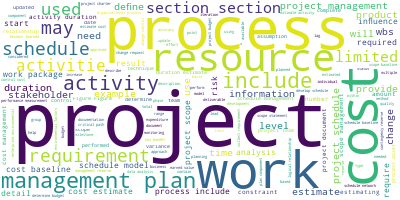

In [81]:
from wordcloud import WordCloud
long_string =ch
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [82]:
df1_pre_final['Definition']=df1_pre_final['Definition'].apply(lambda x : x.replace('described in section',''))
df3_pre_final['Definition']=df3_pre_final['Definition'].apply(lambda x : x.replace('described in section',''))
df5_pre_final['Definition']=df5_pre_final['Definition'].apply(lambda x : x.replace('described in section',''))

In [83]:
def_concept=[]
for elm in df1_pre_final['Definition']:
  def_concept.append(elm.split())
flat_list = [item for sublist in def_concept for item in sublist]
all_data_combined = flat_list+df1_pre_final['concepts'].tolist() +df1_pre_final['process_name'].tolist()+df1_pre_final['DataProperty'].tolist()+df_obj2['Domaine'].tolist()+df_obj2['Object_Property'].tolist()+df_obj2['Range'].tolist()+df_obj1['Domaine'].tolist()+df_obj1['Object_Property'].tolist()+df_obj1['Range'].tolist()+df2_data_property['Range'].tolist()+df2_pre_final['Definition'].tolist()
all_data=[]
for elm in all_data_combined:
  if elm !=None:
    all_data.append(elm)
ch1=''
for e in all_data:
  ch1+='. '+str(e)

In [84]:
def_concept=[]
for elm in df3_pre_final['Definition']:
  def_concept.append(elm.split())
flat_list = [item for sublist in def_concept for item in sublist]
all_data_combined = flat_list+df3_pre_final['concepts'].tolist() +df3_pre_final['process_name'].tolist()+df3_pre_final['DataProperty'].tolist()+df_obj4['Domaine'].tolist()+df_obj4['Object_Property'].tolist()+df_obj4['Range'].tolist()+df_obj3['Domaine'].tolist()+df_obj3['Object_Property'].tolist()+df_obj3['Range'].tolist()+df4_data_property['Range'].tolist()+df4_pre_final['Definition'].tolist()
all_data=[]
for elm in all_data_combined:
  if elm !=None:
    all_data.append(elm)
ch2=''
for e in all_data:
  ch2+='. '+str(e)

In [85]:
def_concept=[]
for elm in df5_pre_final['Definition']:
  def_concept.append(elm.split())
flat_list = [item for sublist in def_concept for item in sublist]
all_data_combined = flat_list+df5_pre_final['concepts'].tolist() +df5_pre_final['process_name'].tolist()+df5_pre_final['DataProperty'].tolist()+df_obj6['Domaine'].tolist()+df_obj6['Object_Property'].tolist()+df_obj6['Range'].tolist()+df_obj5['Domaine'].tolist()+df_obj5['Object_Property'].tolist()+df_obj5['Range'].tolist()+df6_data_property['Range'].tolist()+df6_pre_final['Definition'].tolist()
all_data=[]
for elm in all_data_combined:
  if elm !=None:
    all_data.append(elm)
ch3=''
for e in all_data:
  ch3+='. '+str(e)

In [86]:
corpus=[ch1,ch2,ch3]####################OUR 3 ONTHOLGY TOPICS ###################################

In [87]:
import re
from nltk.tokenize import WordPunctTokenizer
tokens=[]
for doc in corpus:
  doc = re.sub('[^ a-zA-Z]', ' ', doc)
  tokens.append(WordPunctTokenizer().tokenize(doc))######tokenization des texte


In [88]:
len(tokens)

3

In [89]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))####siter les stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
tokens_filtred =[]
for doc in tokens:
  l=[]
  for w in doc :
    if w not in stop_words:
      l.append(w)
  tokens_filtred.append(l) #####eliminer les stopwords du tokens

In [91]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import 	WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer() ####lemmatization des tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [92]:
tokens_filtred_lem =[]
for doc in tokens_filtred:
  l=[]
  for w in doc :
    wordnet_lemmatizer.lemmatize(w)
    l.append(w)
  tokens_filtred_lem.append(l)



In [93]:
import gensim.corpora as corpora###initalistaion du model lda et entrainer 
id2word = corpora.Dictionary(tokens_filtred_lem)
texts = tokens_filtred_lem
corpus = [id2word.doc2bow(text) for text in texts] ##le nombre de redandance du mot dans chaque document 
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]
import gensim ###initalistaion du model lda et entrainer 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                            random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [94]:
# Print the keyword of topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus] ###############visualizer l importance des plus important keywords dans chaque document  

[(0,
  '0.040*"schedule" + 0.035*"project" + 0.029*"activity" + 0.016*"process" + '
  '0.015*"activities" + 0.014*"duration" + 0.011*"work" + 0.011*"resource" + '
  '0.011*"management" + 0.009*"may"'),
 (1,
  '0.044*"project" + 0.031*"scope" + 0.024*"requirements" + 0.022*"process" + '
  '0.015*"product" + 0.014*"management" + 0.014*"wbs" + 0.013*"work" + '
  '0.012*"plan" + 0.011*"include"'),
 (2,
  '0.048*"cost" + 0.038*"project" + 0.018*"work" + 0.017*"management" + '
  '0.014*"costs" + 0.014*"budget" + 0.013*"process" + 0.012*"performance" + '
  '0.010*"estimate" + 0.010*"baseline"')]


In [95]:
!pip install pyLDAvis
import pyLDAvis
from pyLDAvis import gensim_models as model
pyLDAvis.enable_notebook()
vis = model.prepare(lda_model, corpus, id2word)
vis####################### visualizer les topics si il se rassemble avce leurs importants vocabulaires qui existe  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.045578  0.096337       1        1  41.644035
2     -0.069483 -0.083858       2        1  30.916469
1      0.115061 -0.012479       3        1  27.439496, topic_info=              Term        Freq       Total Category  logprob  loglift
235           cost  317.000000  317.000000  Default  30.0000  30.0000
930          scope  212.000000  212.000000  Default  29.0000  29.0000
893   requirements  157.000000  157.000000  Default  28.0000  28.0000
927       schedule  395.000000  395.000000  Default  27.0000  27.0000
19        activity  264.000000  264.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
159         change   26.702228   88.914292   Topic3  -5.3144   0.0903
106       baseline   28.436720  125.373483   Topic3  -5.2515  -0.1904
643            may   26.849965  145.503636   Topic3  -5.3089  -0.3967
1038     technique   21.334315   56.629407   Topic3  -5.5389   0.3170
756    performance   20.551295  103.088610   Topic3  -5.5763  -0.3195

[222 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1901      2  0.951339          ac
5         3  0.961002  acceptance
18        1  0.864581  activities
18        2  0.075479  activities
18        3  0.061756  activities
...     ...       ...         ...
1137      3  0.692381         wbs
1149      1  0.334788        work
1149      2  0.401746        work
1149      3  0.264111        work
1898      1  0.920096           z

[302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [96]:
from gensim.models import CoherenceModel ######### evaluer le model 
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens_filtred_lem, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.447197853081436

Coherence Score:  0.3560238296068871


In [97]:
#################################################### END OF LDA EVALUATION ##################################################################

**8-TF-IDF MOST IMPORTANT WORDS IN THE CORPUS :**

In [98]:
project_cost_management=corpus_pdf('PROJECT_COST_MANAGEMENT.pdf')
project_schedule_management=corpus_pdf('PROJECT_SCHEDULE_MANAGEMENT.pdf')
project_scope_management=corpus_pdf('PROJECT_SCOPE_MANAGEMENT.pdf')
list_document=[project_cost_management,project_schedule_management,project_scope_management]
list_document_names=['cost','schedule','scope']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
# Import re, nltk, and WordNetLemmatizer
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Stopword removal, converting uppercase into lower case, and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
data_without_stopwords = []
for document in list_document:
    doc = re.sub('[^a-zA-Z]', ' ', document)
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc = ' '.join(doc)
    data_without_stopwords.append(doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# Import Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(data_without_stopwords)
print("n_samples: %d, n_features: %d" % vectors.shape)

n_samples: 3, n_features: 2012


In [101]:
# Select the first five documents from the data set
tf_idf = pd.DataFrame(vectors.todense())  
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['document_'+i for i in list_document_names]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:15] 

# Print the first 10 words 
print(tfidf_matrix.drop(columns=['count']).head(15))


             document_cost  document_schedule  document_scope
project           0.474208           0.477882        0.574305
management        0.243512           0.178395        0.226115
cost              0.583860           0.024867        0.020808
schedule          0.092563           0.449771        0.024970
process           0.129588           0.148122        0.217792
plan              0.148101           0.145959        0.190048
activity          0.044145           0.374088        0.023583
scope             0.031329           0.048653        0.346802
requirement       0.032753           0.025948        0.339866
work              0.165190           0.113524        0.112364
section           0.105380           0.130823        0.120687
described         0.086867           0.115686        0.110977
baseline          0.111076           0.095144        0.072135
estimate          0.158069           0.100550        0.005549
may               0.066930           0.122173        0.056876


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
###################################################### END OF TF-IDF ###############################################################################################